### Import Liabraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression        #  >> importing LinearRegression model
from sklearn.model_selection import train_test_split     #  >> for spliting data into two sets for model train and testing

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor      # >> we import vif from statsmodels

import matplotlib.pyplot as plt     # >> for visualization we use matplotlib.pyplot and seaborn
import seaborn as sns
import pickle

### Problem Statement

### Data Gathering

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exporatory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### 1. Id

In [5]:
df["Id"]

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [6]:
df["Id"].nunique()


# to check the number of unique values in id column 
# we can not able to do analaysis for table which have the unique data  

150

### 2. SepalWidthCm

In [7]:
df["SepalWidthCm"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

In [8]:
df["SepalWidthCm"].nunique()

23

In [9]:
df["SepalWidthCm"].isnull().sum()

0

### 3.PetalLengthCm

In [10]:
df["PetalLengthCm"]

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

In [11]:
df["PetalLengthCm"].nunique()

43

In [12]:
df["PetalLengthCm"].isnull().sum()

0

### 4. PetalWidthCm

In [13]:
df["PetalWidthCm"]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64

In [14]:
df["PetalWidthCm"].nunique()

22

In [15]:
df["PetalWidthCm"].isnull().sum()

0

### 5. Species

In [16]:
df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [17]:
df["Species"].nunique()

3

In [18]:
df["Species"].isnull().sum()

0

In [19]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [20]:
# this column is having object datatype. So we have to encode this column 

In [21]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Feature Enginerring

In [22]:
df.drop("Id", axis = 1, inplace = True)

In [23]:
df["Species"].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [24]:
#df["Species"].replace({"Iris-setosa" :0, "Iris-versicolor" : 1, "Iris-virginica" : 2}, inplace = True)

In [25]:
df = pd.get_dummies(df, columns = ["Species"], prefix = " ", prefix_sep = " ")

In [26]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SepalLengthCm      150 non-null    float64
 1   SepalWidthCm       150 non-null    float64
 2   PetalLengthCm      150 non-null    float64
 3   PetalWidthCm       150 non-null    float64
 4     Iris-setosa      150 non-null    bool   
 5     Iris-versicolor  150 non-null    bool   
 6     Iris-virginica   150 non-null    bool   
dtypes: bool(3), float64(4)
memory usage: 5.3 KB


In [28]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


### Feature Selection

#### In fetaure selection we check the all assumption of Linear Regression 

### 1. Linarity

In [29]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


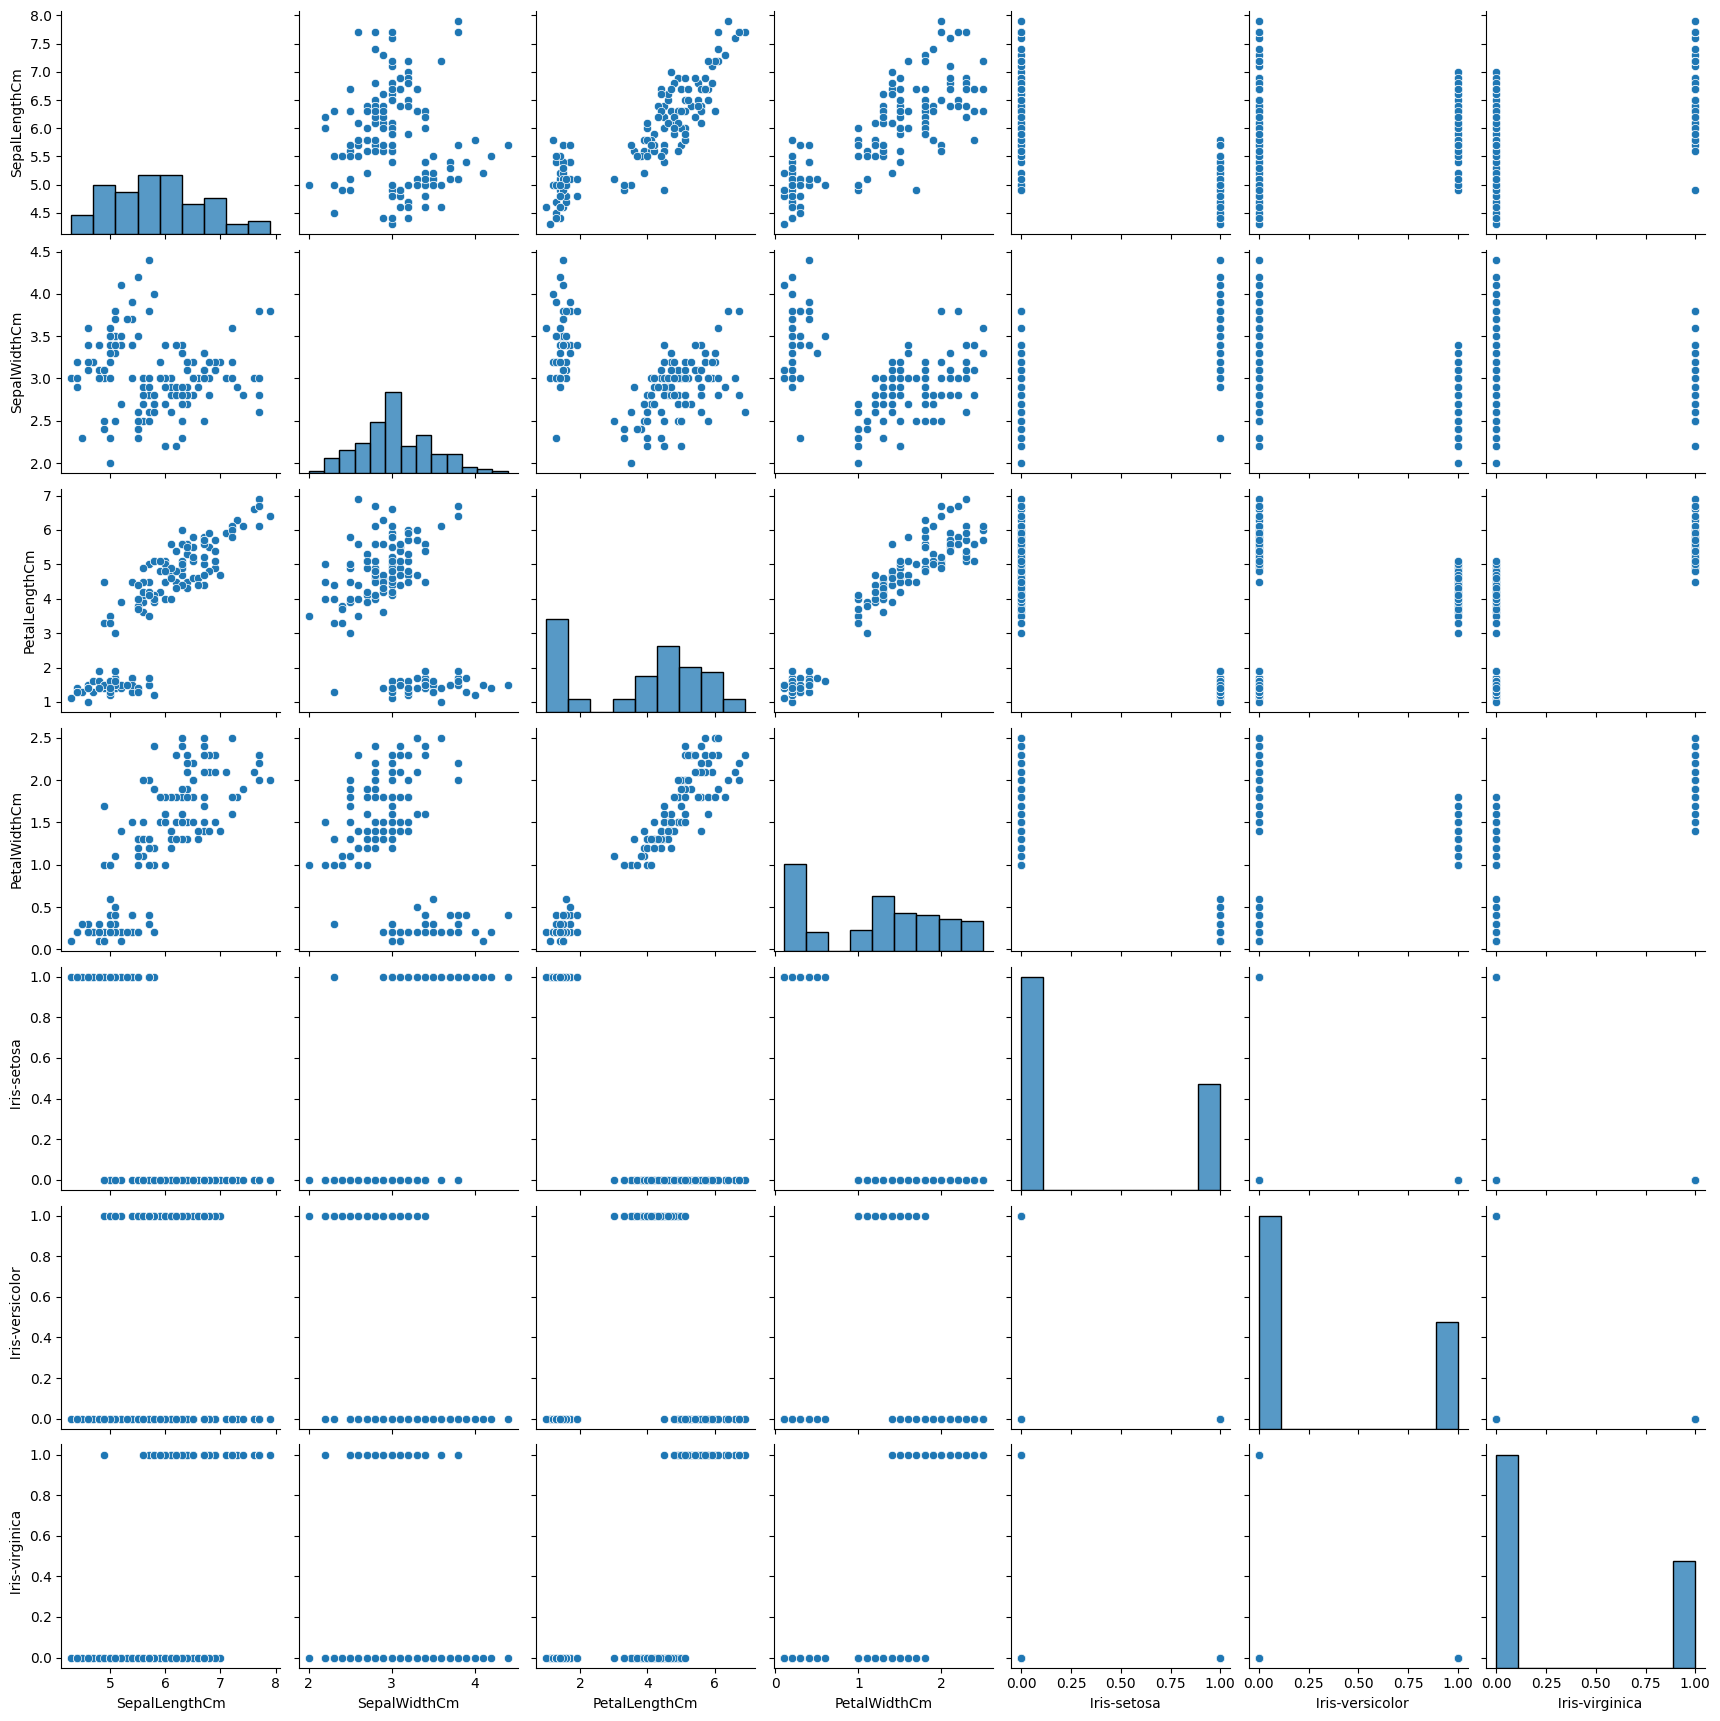

In [30]:
sns.pairplot(df)

<Axes: >

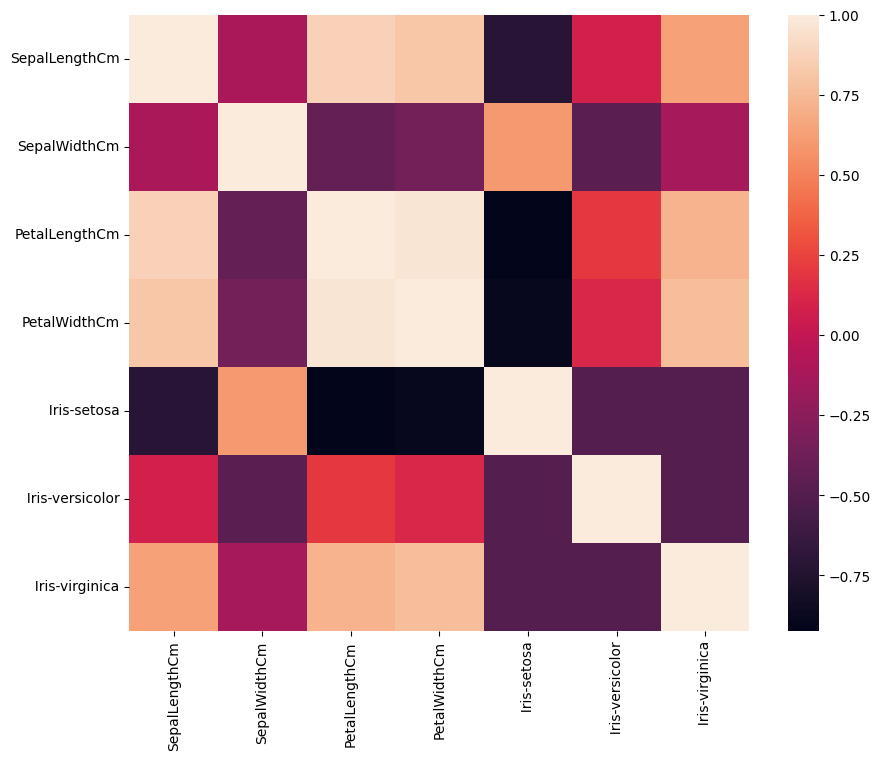

In [31]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())

<Axes: >

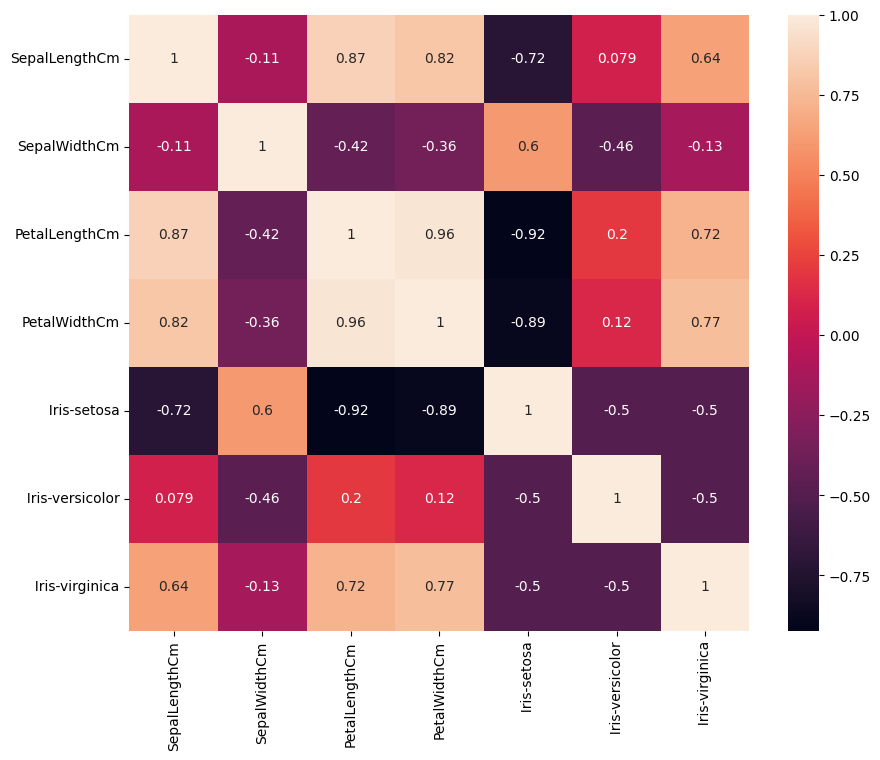

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

# annot is used to give values of correlation

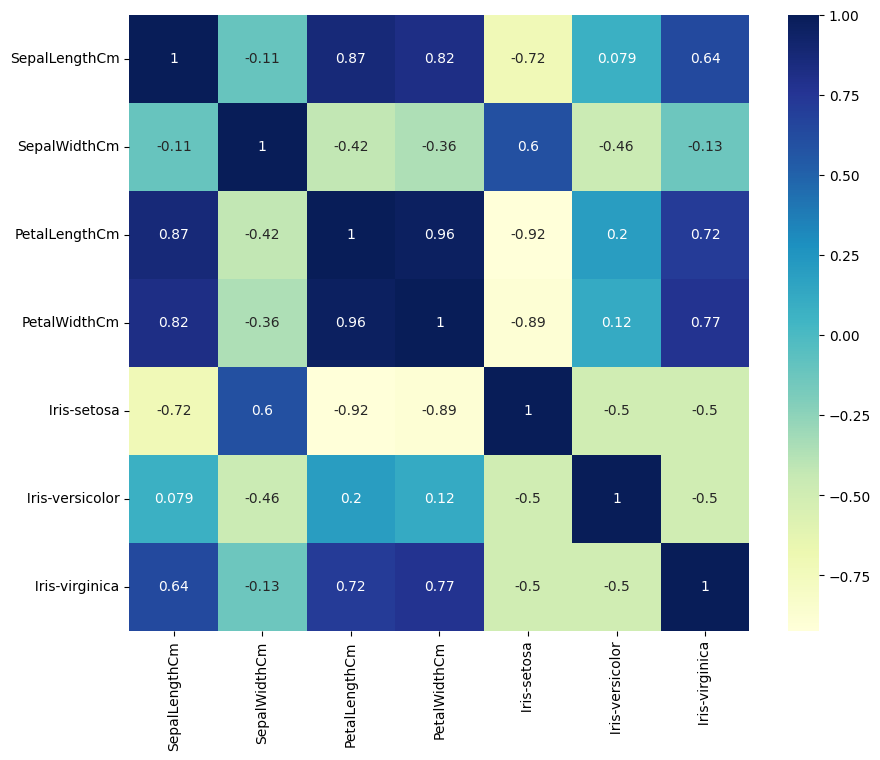

In [33]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap= "YlGnBu")
plt.savefig("Iris_correlation_graph.png")



# to save we use plt.savefig and to change the colour of given graph use the cmp ="YlGnBu"their are many coloure are availabale 

### 2. No Multicollinarity

####  their should not be good correlction between independent variables

In [34]:
df1 = df.drop("SepalLengthCm", axis = 1)
df1

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,3.5,1.4,0.2,True,False,False
1,3.0,1.4,0.2,True,False,False
2,3.2,1.3,0.2,True,False,False
3,3.1,1.5,0.2,True,False,False
4,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...
145,3.0,5.2,2.3,False,False,True
146,2.5,5.0,1.9,False,False,True
147,3.0,5.2,2.0,False,False,True
148,3.4,5.4,2.3,False,False,True


In [35]:
df1.to_numpy()

array([[3.5, 1.4, 0.2, True, False, False],
       [3.0, 1.4, 0.2, True, False, False],
       [3.2, 1.3, 0.2, True, False, False],
       [3.1, 1.5, 0.2, True, False, False],
       [3.6, 1.4, 0.2, True, False, False],
       [3.9, 1.7, 0.4, True, False, False],
       [3.4, 1.4, 0.3, True, False, False],
       [3.4, 1.5, 0.2, True, False, False],
       [2.9, 1.4, 0.2, True, False, False],
       [3.1, 1.5, 0.1, True, False, False],
       [3.7, 1.5, 0.2, True, False, False],
       [3.4, 1.6, 0.2, True, False, False],
       [3.0, 1.4, 0.1, True, False, False],
       [3.0, 1.1, 0.1, True, False, False],
       [4.0, 1.2, 0.2, True, False, False],
       [4.4, 1.5, 0.4, True, False, False],
       [3.9, 1.3, 0.4, True, False, False],
       [3.5, 1.4, 0.3, True, False, False],
       [3.8, 1.7, 0.3, True, False, False],
       [3.8, 1.5, 0.3, True, False, False],
       [3.4, 1.7, 0.2, True, False, False],
       [3.7, 1.5, 0.4, True, False, False],
       [3.6, 1.0, 0.2, True, Fal

In [36]:
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns
vif_df

,Features
0,SepalWidthCm
1,PetalLengthCm
2,PetalWidthCm
3,Iris-setosa
4,Iris-versicolor
5,Iris-virginica


In [ ]:
vif_df["VIF"]  = vif_list
vif_df

### Train Model

In [38]:
x = df.drop("SepalLengthCm", axis = 1)   # independent variables 
y = df["SepalLengthCm"]

In [39]:
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,3.5,1.4,0.2,True,False,False
1,3.0,1.4,0.2,True,False,False
2,3.2,1.3,0.2,True,False,False
3,3.1,1.5,0.2,True,False,False
4,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...
145,3.0,5.2,2.3,False,False,True
146,2.5,5.0,1.9,False,False,True
147,3.0,5.2,2.0,False,False,True
148,3.4,5.4,2.3,False,False,True


In [40]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

### Train Test Split

150 row>>
          tarin  80% >> 120 rows
          test   20% >> 30 rows

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle = True, random_state = 11)
x_train




# we want shuffle data from dataset that why we use shuffle = True
# when we are using shuffle = True every time its give new data set but for train the model our data set should not have
# to change for that we use the random_state parameter from tarin_test_split function


# and while using random_state = 1/2/10/15  (value)  
# you can give any value but onces you give that value you sholud not have to change for hole tarin model


,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,3.5,1.4,0.2,True,False,False
120,3.2,5.7,2.3,False,False,True
122,2.8,6.7,2.0,False,False,True
49,3.3,1.4,0.2,True,False,False
29,3.2,1.6,0.2,True,False,False
...,...,...,...,...,...,...
76,2.8,4.8,1.4,False,True,False
13,3.0,1.1,0.1,True,False,False
81,2.4,3.7,1.0,False,True,False
91,3.0,4.6,1.4,False,True,False


In [42]:
x_test

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
112,3.0,5.5,2.1,False,False,True
145,3.0,5.2,2.3,False,False,True
133,2.8,5.1,1.5,False,False,True
56,3.3,4.7,1.6,False,True,False
111,2.7,5.3,1.9,False,False,True
9,3.1,1.5,0.1,True,False,False
65,3.1,4.4,1.4,False,True,False
15,4.4,1.5,0.4,True,False,False
30,3.1,1.6,0.2,True,False,False
63,2.9,4.7,1.4,False,True,False


In [43]:
y_train

0      5.1
120    6.9
122    7.7
49     5.0
29     4.7
      ... 
76     6.8
13     4.3
81     5.5
91     6.1
80     5.5
Name: SepalLengthCm, Length: 120, dtype: float64

In [44]:
y_test

112    6.8
145    6.7
133    6.3
56     6.3
111    6.4
9      4.9
65     6.7
15     5.7
30     4.8
63     6.1
119    6.0
62     6.0
84     5.4
113    5.7
139    6.9
41     4.5
103    6.3
66     5.6
110    6.5
142    5.8
69     5.6
2      4.7
22     4.6
51     6.4
12     4.8
11     4.8
149    5.9
75     6.6
16     5.4
85     6.0
Name: SepalLengthCm, dtype: float64

#### Instantiating Linar Regression Model

In [45]:
# while importing we import class LinarRegression so we have to instantiate that

linear_reg_model = LinearRegression()
linear_reg_model

LinearRegression()

#### .fit   >> to tarin the model

In [46]:
linear_reg_model.fit(x_train, y_train)

# in this backend Gradient Desencet working  >> Best M and c   .... Best Fit Line

LinearRegression()

In [47]:
with open("linear_model.pkl", "wb") as file:
    pickle.dump(linear_reg_model, file)

In [48]:
x_test.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
112,3.0,5.5,2.1,False,False,True
145,3.0,5.2,2.3,False,False,True
133,2.8,5.1,1.5,False,False,True
56,3.3,4.7,1.6,False,True,False
111,2.7,5.3,1.9,False,False,True


In [49]:
linear_reg_model.predict(x_test.head())

array([6.52168486, 6.19173117, 6.28921793, 6.50698313, 6.26626142])

In [57]:
SepalWidthCm = 3.0 
PetalLengthCm = 5.5 
PetalWidthCm = 2.1
Species = "Iris-virginica"

In [64]:
columns_list = x.columns
columns_list

Index(['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', '  Iris-setosa',
       '  Iris-versicolor', '  Iris-virginica'],
      dtype='object')

In [65]:
file = open("columns_list.obj", "wb")
pickle.dump(columns_list, file)
file.close()

In [66]:
array = np.zeros(len(columns_list))
array

array([0., 0., 0., 0., 0., 0.])

In [77]:
array[0] = SepalWidthCm
array[1] = PetalLengthCm
array[2] = PetalWidthCm
index = np.where(columns_list == Species)[0][0]
print(index)
array[index] = 1

IndexError: index 0 is out of bounds for axis 0 with size 0

In [78]:
array

array([3. , 5.5, 2.1, 0. , 0. , 0. ])

In [ ]:
test_array = [SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]

In [ ]:
prediction = linear_reg_model.predict([test_array])
prediction